# REGULARIZATION

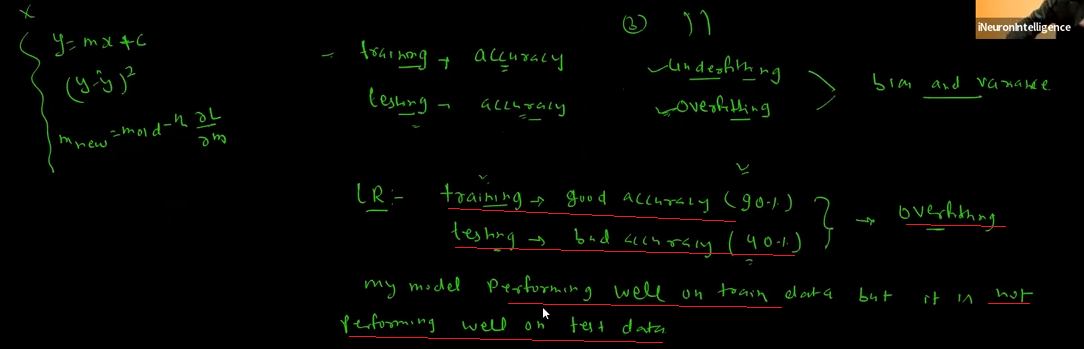

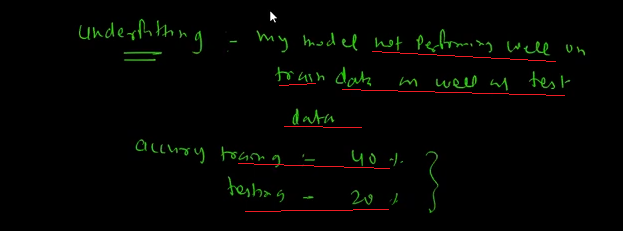

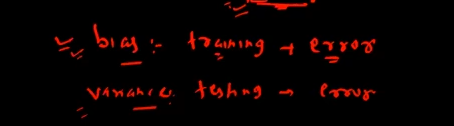

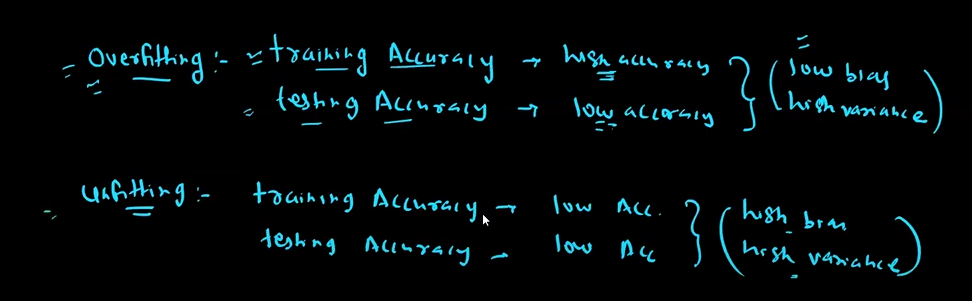

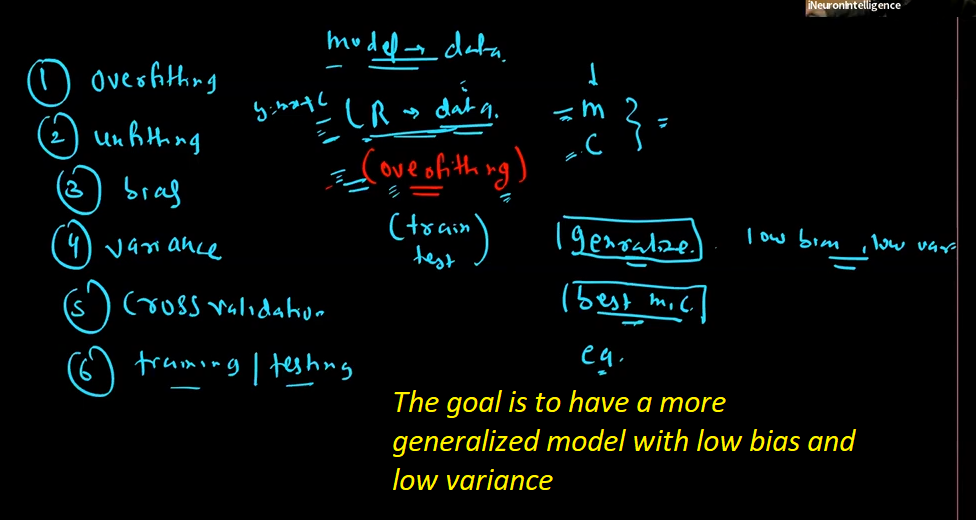

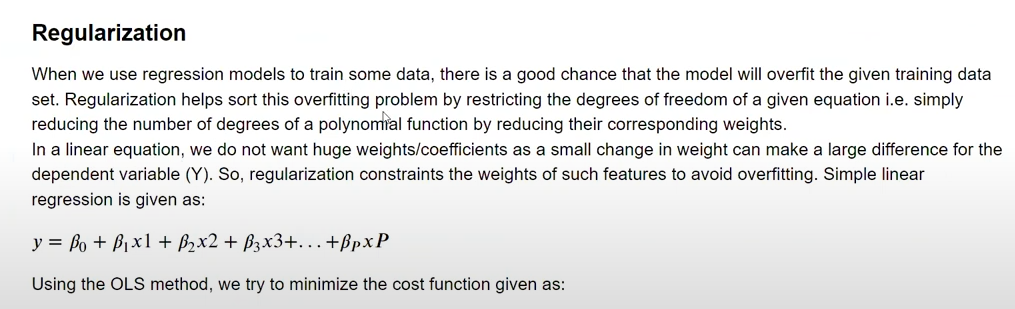

### Regularization 
When we use regression models to train some data, there is a good chance that the model will overfit the given training data set.  Regularization helps sort this overfitting problem by restricting the degrees of freedom of a given equation i.e. simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.  
In a linear equation, we do not want huge weights/coefficients as a small change in weight can make a large difference for the dependent variable (Y). So, regularization constraints the weights of such features to avoid overfitting. Simple linear regression is given as:

$y = \beta_0 + \beta_1x1+ \beta_2x2 +\beta_3x3+...+\beta_PxP$

Using the OLS method, we try to minimize the cost function given as:

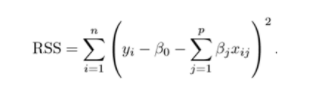

To regularize the model, a Shrinkage penalty is added to the cost function.
Let’s see different types of regularizations in regression:


#### LASSO(Least Absolute Shrinkage and Selection Operator) Regression (L1 Form)
LASSO regression penalizes the model based on the sum of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

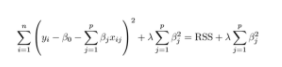

#### Ridge Regression (L2 Form)
Ridge regression penalizes the model based on the sum of squares of magnitude of the coefficients. The regularization term is given by

 regularization=$ \lambda *\sum  |\beta_j ^ 2| $

Where, λ is the shrinkage factor.

and hence the formula for loss after regularization is:

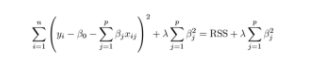

This value of lambda can be anything and should be calculated by cross validation as to what suits the model.

Let’s consider $\beta_1$ and $\beta_2$ be coefficients of a linear regression and λ = 1:

For Lasso, $\beta_1$ + $\beta_2$ <= s  

For Ridge, $\beta_1^2$ + $\beta_2^2$  <= s  

Where s is the maximum value the equations can achieve
.
If we plot both the above equations, we get the following graph:

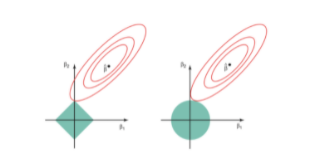

The red ellipse represents the cost function of the model, whereas the square (left side) represents the Lasso regression and the circle (right side) represents the Ridge regression.


##### Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


##### Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


##### Elastic Net

According to the Hands-on Machine Learning book, elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio α. 

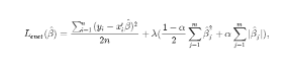

where α is the mixing parameter between ridge (α = 0) and lasso (α = 1).

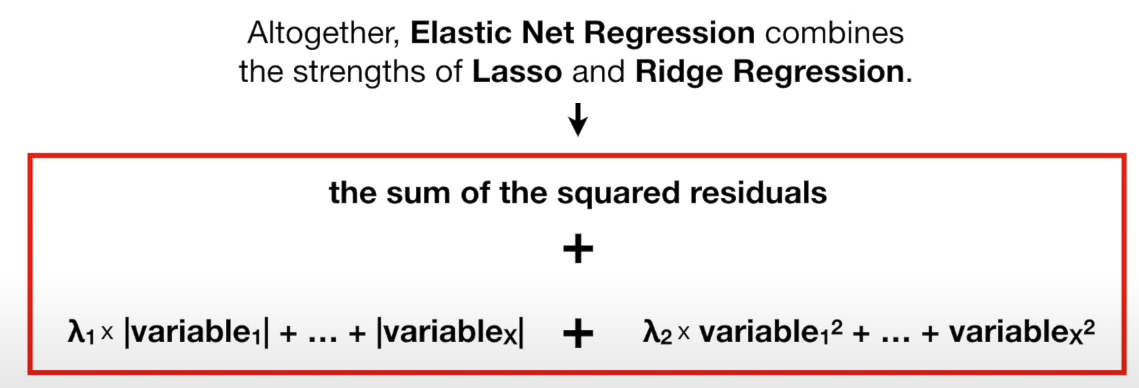

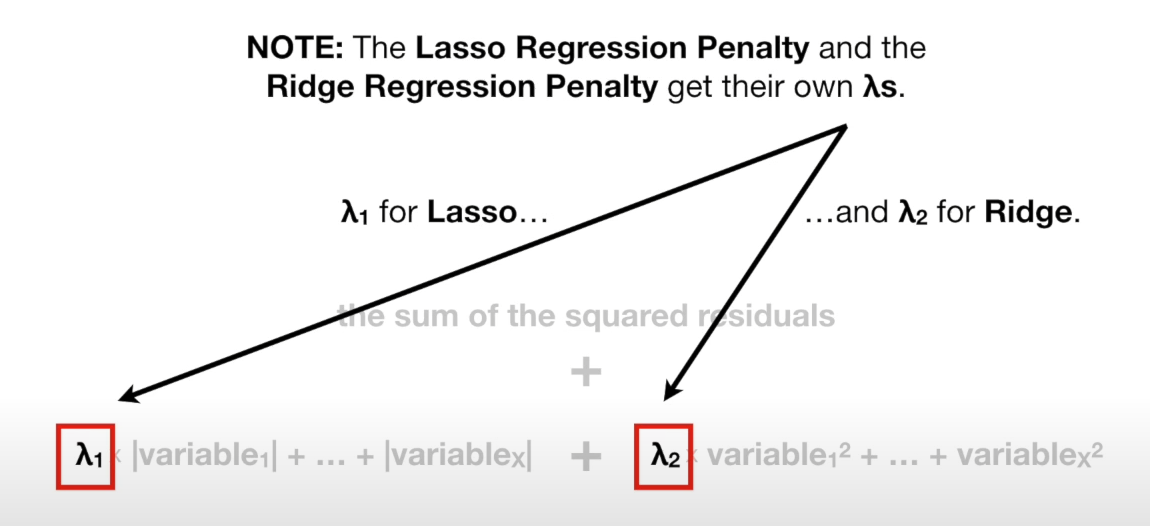

* when both lambdas are zero we get linear regression
* when lambda lasso is > 0 and lambda ridge = 0 we end up with lasso regression
* when lambda lasso is = 0 and lambda ridge > 0 we end up with ridge regression
* when both lambdas > 0 we get an hybrid elastic net regression

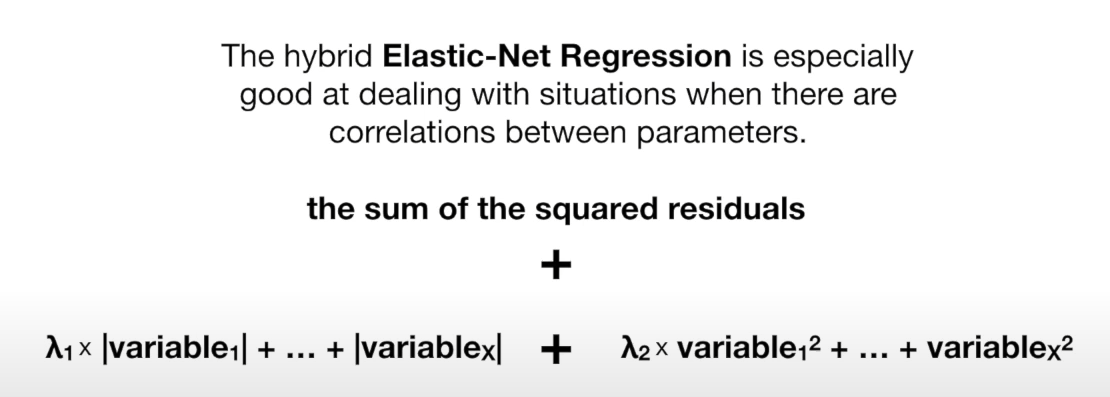

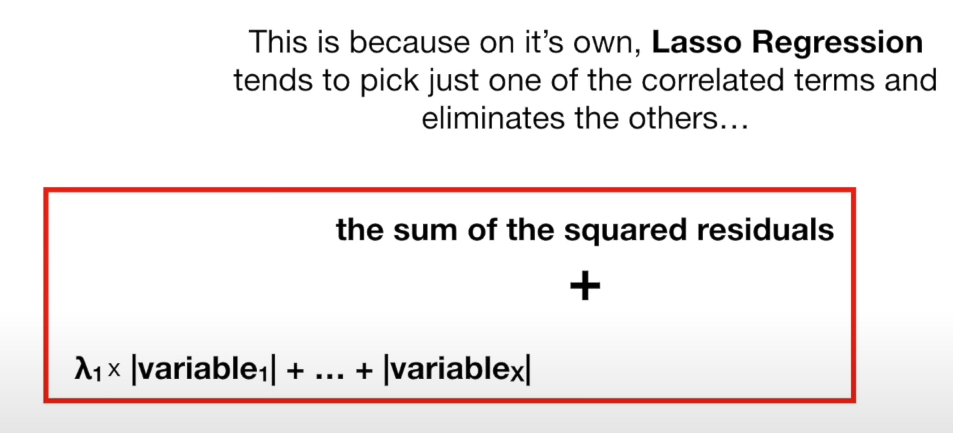

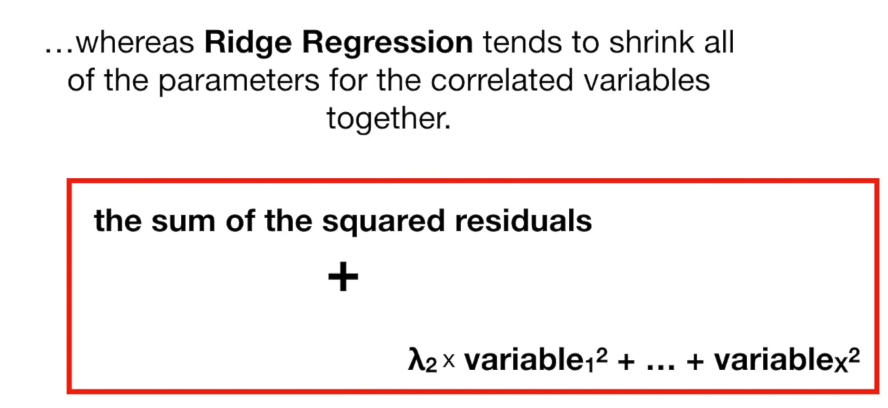

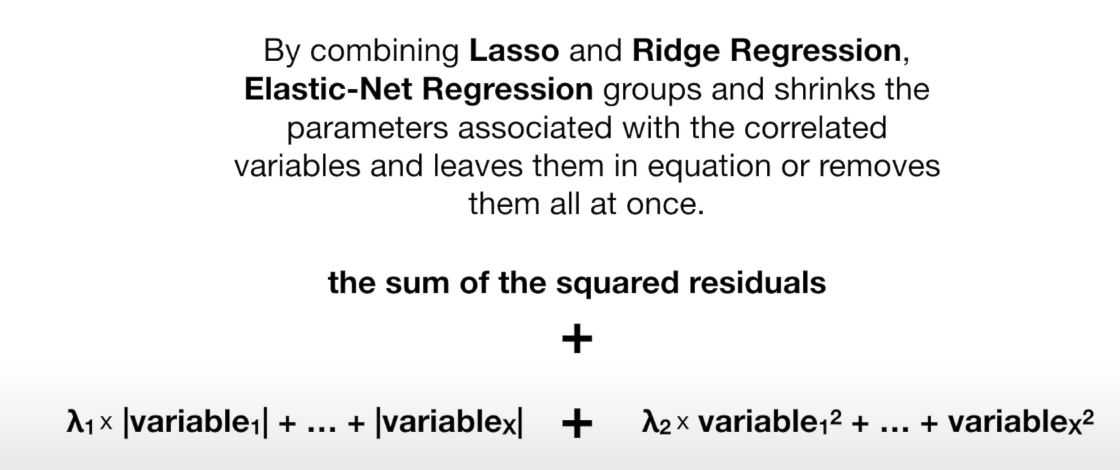

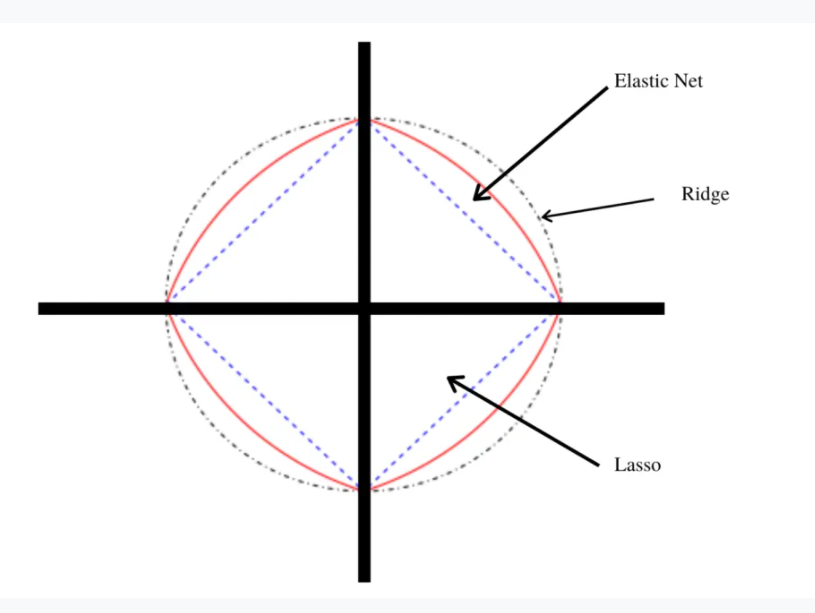

**When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**
​
According to the Hands-on Machine Learning book, it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.
​
No let's see the Python Implementation of these concepts:

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib

Using matplotlib backend: Qt5Agg
